In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


n_bins = 500
cutoff_freq = 50

# create a square wave
rate = 10000
signal = pd.DataFrame(np.zeros(3*rate))
signal.iloc[rate:2*rate] = 1

In [2]:
# get a fourier transform of that
n = signal.size
fft = np.fft.rfft(p[0])
freq = np.fft.rfftfreq(n, 1/rate)

# create DF out of fft data
signal_fft = pd.DataFrame()
signal_fft['fft_real'] = np.real(fft)
signal_fft['fft_imag'] = np.imag(fft)
signal_fft['freq'] = freq

# bin the data
bins = np.linspace(0, cutoff_freq, n_bins)
signal_fft['bins'] = pd.cut(p_fft['freq'], bins=bins, include_lowest=True)

signal_fft_means = signal_fft.groupby('bins').mean().reset_index()
signal_fft_merged = pd.merge(p_fft, p_fft_means, how='left', on='bins')

NameError: name 'p' is not defined

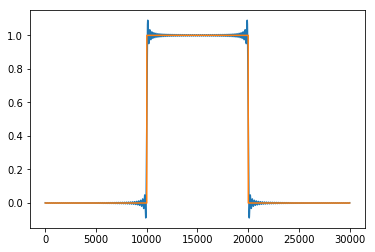

In [182]:
# do the inverse fourier transform

fft_real = np.array(signal_fft_merged['fft_real_y'].fillna(0))
fft_imag = np.array(signal_fft_merged['fft_imag_y'].fillna(0))

fft_filtered = fft_real + np.array([1j])*fft_imag

signal_filtered = np.fft.irfft(fft_filtered)
plt.plot(signal_filtered)
plt.plot(signal)